In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F2609027%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8a43a1a83dc0ff44926f59ff850e954ed0aff954baff7de6f13abd8abf10fe7b216001c4452f09de850820e547a50024075aeafb565e318a9012d8aed6b730e68dd4a89d2740195de1f2c0fe9af0762ddbe257438792c31cc940503db0bebaa31aa9e33145e86237203d0fa39fe6e06eaf3f0a1f1747a665c92d30ac5f8120bc3677093b5d5bfe1fe25fe24fe1fb1ae60e07640c5c3a799b764bf17ba1bd5d3255df5f2e0a88dd0fb3ce8be027b5686e5bf6600325eafa27bb3919b3c2b8658c836e9e69c921f43ebc7d1a052d2ef1d4c491a2d45f60ede8d6adc78055af6e5551bbde84eb2935391c799c23e01a66cc689c6b6538cc4ca1fb5521d4b7932d91,banananaaaa:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1767986%2F2902808%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3eb3739faf78486b583770c708dbd3ddc5e83e3ef61fe19c7ea5ea5ed592cc8ea252f57163420fcc621d20cc5ec9b7fc17b9e3a13b9fbc3c526df87be96b716f697db67627e3a7c0bd734cc6c27b922990273d09f227b73d23571c2491f1c2fde5a79a97c4929691a0a983af2b45c3f5166e91c595bdcad6df3fa5407fcfcda6c1cd2de2ed2103420da2c7b809ff93f6645713e3928dbeeded321e26dc11bbc0de62040eaea2e85507bb2c33013ce4b08fa4fea1dcd6011ebeb2ea9d9670ec38f2b5c47b4428658bcb3638c0463c2d8a3378aae2501b3b2df706f3a78c020c5b9f4332367b51f076d51d2b3c7467516f7d06b09b310057ef092c717faaab5851,good-and-bad-fruits-ieee-extended:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2008587%2F3322713%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D714a469ce3320cd0f2586556c67df5ca62721f1fc6e18c2398acbe2d64dcef368c7692e1ae92e091a7038965208fc7ab3e833ff2c06af42e3d486c843dde8892480000657f967f050bfeecc02afea401db31a291de240521dc71d18e40658fa0d7e44e88498c6932c6ec0ac193382edba4b942a5f0e4352cabec67529c803554379a35f3d400570c103ad926d1e43ecf853336f95c1f80f4f17b3bca9dfd14d695457b3aee4d2f7551e8637e50a8837d26199e367d27603a67cc54d1f969e92074fbdc840b67a7f894442cf6b4d0f4ace6c603060a7e2936a13202276142fc6c9a63a895fa8c6cab941c6e4e770fa7ad20557adf6c96b03d7dd3259b49ec4ebe,sample-fruitsveg:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2034784%2F3374672%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74e6b5c433ba80d6b57096b53d2b635670e0f3ac8980fa7daadce77149e482d15a37d40676f7e841491e0f9963022bfdb12e52ca90e1aee4c8e713f6d006a4f19cd36717f78e6dc8b2665225363a3bc5c094644d061ca5a82afbc911769681a10ea512c8114dba5850aac4a072d556e9ffa187f31147d2b9694d2fe4018fe4b9f150b35735a315ac520a0e9037fc7d56ab0d98319a8cde2173a73a38c1c674e4a0cc1cc9fd31acf138f57e645d4ef0734128b574ae91f21785a2fa3040739ad8f2520feecd1f58e8724611f72d8bb4236d2b5961b95a6e3f50e7275c5eed108c55f3df9918b691cac85890f460d8d878e8aa3df8946d15176eb0df5ac6b9f7ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1379678841 bytes downloaded
Downloaded and uncompressed: fruits
[==================================================] 252268 bytes downloaded
Downloaded and uncompressed: banananaaaa
[==================================================] 212292963 bytes downloaded
Downloaded and uncompressed: good-and-bad-fruits-ieee-extended
[==================================================] 167051 bytes downloaded
Downloaded and uncompressed: sample-fruitsveg
Data source import complete.


## Introduction

> This notebook used the [Fruit 360](https://www.kaggle.com/moltean/fruits) dataset.

Instead of using CNN block to train the model, I tried to use the Vision Transformer (ViT) which is based on the paper [Image is worth 16 x 16 words](https://arxiv.org/abs/2010.11929). The model has already been build in the [**transformers**](https://huggingface.co/transformers/model_doc/vit.html) package.

Below are some resources to help readers to know more about ViT
* [Paper](https://www.kaggle.com/moltean/fruits)
* [Video](https://youtu.be/TrdevFK_am4)
* [Implement ViT from scratch using PyTorch](https://towardsdatascience.com/implementing-visualttransformer-in-pytorch-184f9f16f632)

### Download the trained model

I had put the trained weight on Google Drive. Users can download it by running below two blocks

In [2]:
!pip install gdown

In [3]:
# Download the model weight if users want to use the
#  trained model for this task (Fruits 360)
!gdown  https://drive.google.com/uc?id=1YfVZ7aUefO8Zx5UVnyJg8nIuOLyNcx-Y

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1YfVZ7aUefO8Zx5UVnyJg8nIuOLyNcx-Y

but Gdown can't. Please check connections and permissions.


In [4]:
# Pytorch
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchvision import transforms
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# Build up the pretrained transformers model
from transformers import ViTFeatureExtractor, ViTModel

# Plot tool
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [5]:
# Set up device and training hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 30
latent_dim = 256
epochs = 1
learning_rate = 5e-4

print(device)

cuda


## Build up dataset and dataloader

In [6]:
# Add the transformation of image
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

# Path for training and validation dataset
#training_path = "../input/fruits/fruits-360/Training"
#validating_path = "../input/fruits/fruits-360/Test"

training_path = "../input/good-and-bad-fruits-ieee-extended/IEEEFRUITSDATA_test&train/train"
validating_path = "../input/good-and-bad-fruits-ieee-extended/IEEEFRUITSDATA_test&train/test"
test_path="../input/sample-fruitsveg"

In [7]:
# Create train, val dataset
training_dataset = ImageFolder(training_path,
                               transform=data_transforms)
validating_dataset = ImageFolder(validating_path,
                                 transform=data_transforms)

# Create train, val dataloader
training_dataloader = DataLoader(training_dataset,
                                 batch_size=batch_size,
                                 shuffle=True)
val_dataloader = DataLoader(validating_dataset,
                            batch_size=batch_size,
                            shuffle=True)

In [8]:
#val_dataloader.type()

In [9]:
test_dataset = ImageFolder(test_path,
                                 transform=data_transforms)

In [10]:
test_dataloader = DataLoader(test_dataset,
                            batch_size=batch_size,
                            shuffle=True)

## How our data look like?

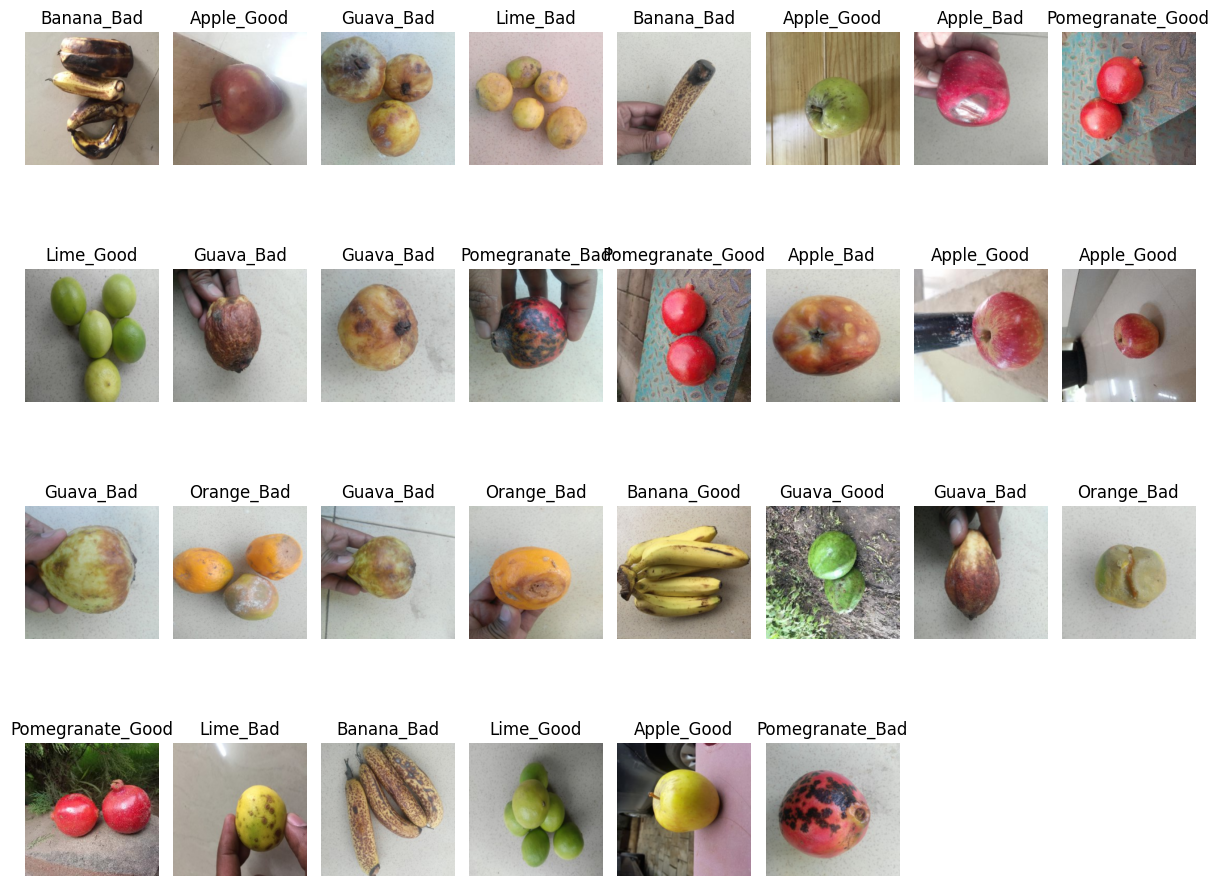

In [11]:
image_size = 32

# Get the image from dataloader
show_images, show_labels = next(iter(training_dataloader))
show_images = show_images[:image_size]
show_labels = show_labels[:image_size]

ncols = 8
nrows = int(image_size / ncols) + 1

# Set up the figure size
plt.figure(figsize=(12, 12))


def inverse_normalized(image):
    # Clamp the value to (0.0, 1.0) for floats
    image = torch.clamp(input=image * 0.5 + 0.5,
                        min=0.0,
                        max=1.0)
    return image


for idx in range(len(show_images)):
    # Set up the subplot
    plt.subplot(nrows, ncols, idx + 1)

    # Close the axis and plot the image
    plt.axis("off")
    # Note that the label is change into integer, we should change it back to category
    plt.title(training_dataset.classes[show_labels[idx].item()])
    # Note that the image channel of tensor is: (channel, width, height)
    # We need to change it to (width, height, channel) which we use permute to realize it
    plt.imshow(inverse_normalized(show_images[idx].permute(1, 2, 0)))

# Avoid overlapping of different titles
plt.tight_layout()

## Build the model

In [12]:
class CategoryClass(nn.Module):
    def __init__(self, vit, latent_dim, classes_):
        super(CategoryClass, self).__init__()

        self.classes_ = classes_

        # Set up model architecture
        self.vit = vit
        self.fc_1 = nn.Linear(768, latent_dim)
        self.fc_out = nn.Linear(latent_dim, self.classes_)
        self.dropout = nn.Dropout(0.2)

    def forward(self, in_data):
        # Type of output `BaseModelOutputWithPooling`
        vit_outputs = self.vit(in_data)

        # Shape of pooler_output: (batch_size, hidden_size)
        pooler_output = vit_outputs.pooler_output

        # Pass through the linear layout to predict the class
        # Shape of output: (batch_size, classes_)
        outputs = torch.relu(self.fc_1(pooler_output))
        outputs = self.fc_out(self.dropout(outputs))

        return outputs

In [13]:
# Set up the pretrained model
vit = ViTModel.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# Freeze the layers in vit exclude the pooler layers
for param in vit.parameters():
    param.requires_grad = False

vit.pooler.dense.weight.requires_grad = True
vit.pooler.dense.bias.requires_grad = True

In [15]:
# Create the complete model
model = CategoryClass(vit,
                      latent_dim,
                      len(training_dataset.classes)).to(device)

In [16]:
# Set up loss function and optimizers
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), learning_rate)

In [17]:
# Save the training and validating information
training_loss_history =[]
training_accuracy_history = []
validating_loss_history = []
validating_accuracy_history = []

# We only train one epoch
#  Therefore, we save the batch information
batch_loss_history = []
batch_accuracy_history = []
epochs=6

for epoch in range(epochs):
    # Set to the train mode
    model.train()

    train_epoch_loss = 0.0
    train_epoch_accuracy = 0.0
    for idx, (images, labels) in enumerate(training_dataloader):
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)

        # Pass through the model
        outputs = model(images)

        # Count the loss and update the parameters
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the training information
        train_epoch_loss += loss.item()
        predict_class = outputs.argmax(dim=-1)
        accuracy = torch.sum(predict_class == labels).item() / labels.shape[0]
        train_epoch_accuracy += accuracy

        # Save the batch information
        batch_loss_history.append(loss.item())
        batch_accuracy_history.append(accuracy)

        # Print batch information
        print(f"Batch {idx + 1} in epoch {epoch + 1}/{epochs}")
        print(f"Average loss: {loss.item()}")
        print(f"Average accuracy {accuracy}")

    # Set to the eval mode
    model.eval()

    val_epoch_loss = 0.0
    val_epoch_accuracy = 0.0

    with torch.no_grad():
        for val_images, val_labels in val_dataloader:
            # Move data to the device
            val_images = val_images.to(device)
            val_labels = val_labels.to(device)

            # Pass through model
            val_outputs = model(val_images)

            # Count the loss and accuracy
            val_epoch_loss += criterion(val_outputs, val_labels)
            val_predict_class = val_outputs.argmax(dim=-1)
            val_epoch_accuracy += torch.sum(val_predict_class == val_labels).item() / val_labels.shape[0]

    # Save the epoch information
    training_loss_history.append(train_epoch_loss / len(training_dataloader))
    training_accuracy_history.append(train_epoch_accuracy / len(training_dataloader))
    validating_loss_history.append(val_epoch_loss / len(val_dataloader))
    validating_accuracy_history.append(val_epoch_accuracy / len(val_dataloader))

    # Print the information
    print(f"Epoch {epoch + 1}")
    print(f"Average training loss: {training_loss_history[-1]}, Average validation loss: {validating_loss_history[-1]}")
    print(f"Average training accuracy: {training_accuracy_history[-1]}, Average validation accuracy: {validating_accuracy_history[-1]}")

Streaming output truncated to the last 5000 lines.
Average loss: 0.010380739346146584
Average accuracy 1.0
Batch 153 in epoch 1/6
Average loss: 0.010800563730299473
Average accuracy 1.0
Batch 154 in epoch 1/6
Average loss: 0.013771509751677513
Average accuracy 1.0
Batch 155 in epoch 1/6
Average loss: 0.014966984279453754
Average accuracy 1.0
Batch 156 in epoch 1/6
Average loss: 0.0074295406229794025
Average accuracy 1.0
Batch 157 in epoch 1/6
Average loss: 0.0029516699723899364
Average accuracy 1.0
Batch 158 in epoch 1/6
Average loss: 0.029756350442767143
Average accuracy 1.0
Batch 159 in epoch 1/6
Average loss: 0.031030403450131416
Average accuracy 1.0
Batch 160 in epoch 1/6
Average loss: 0.01226448081433773
Average accuracy 1.0
Batch 161 in epoch 1/6
Average loss: 0.013193788006901741
Average accuracy 1.0
Batch 162 in epoch 1/6
Average loss: 0.026759793981909752
Average accuracy 1.0
Batch 163 in epoch 1/6
Average loss: 0.007000750862061977
Average accuracy 1.0
Batch 164 in epoch 1/6


In [18]:
# Save the model weight
torch.save(model.state_dict(), "model.pt")

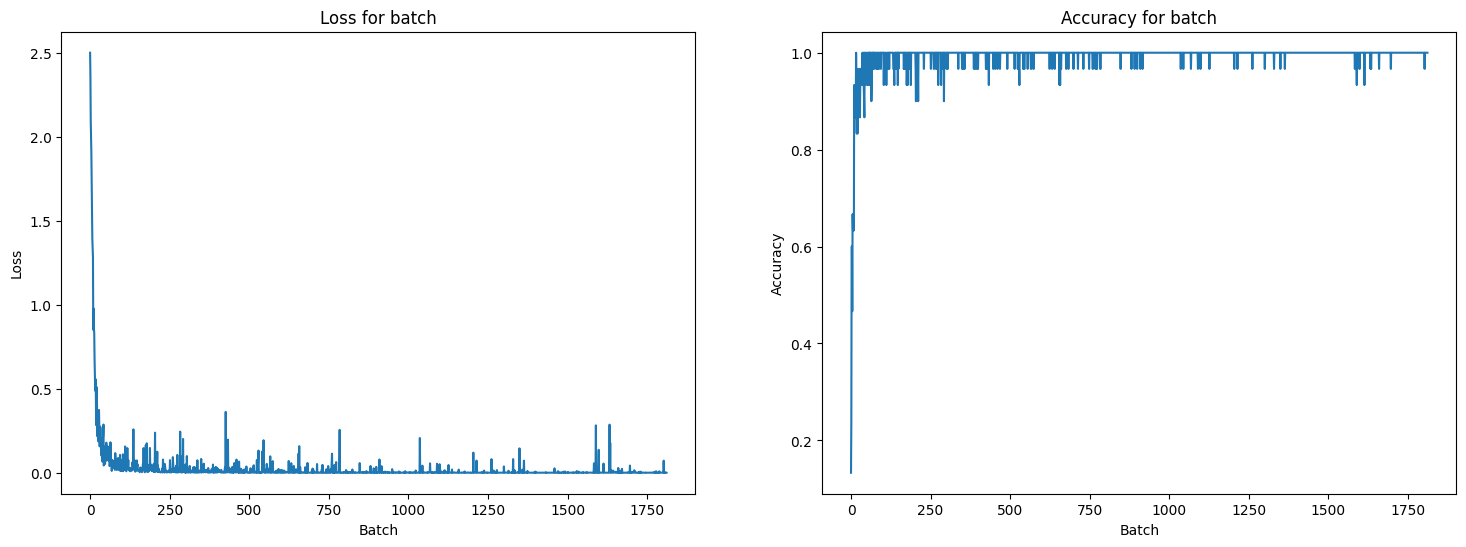

In [19]:
# Plot the loss and accuracy
plt.figure(figsize=(18,6))

# Loss
plt.subplot(1, 2, 1)
plt.title("Loss for batch")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(batch_loss_history)

# Accuracy
plt.subplot(1, 2, 2)
plt.title("Accuracy for batch")
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.plot(batch_accuracy_history)

In [20]:
prediction = []
true_labels = []

# Create the classification report on test dataset
with torch.no_grad():
    for val_images, val_labels in val_dataloader:
        # Move data to the device
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)

        # Pass through model
        val_outputs = model(val_images)
        #print(val_outputs)

        # Count the loss and accuracy
        val_predict_class = val_outputs.argmax(dim=-1)
        #print(val_predict_class)

        prediction.extend([predict_class.item() for predict_class in val_predict_class])
        true_labels.extend([val_label.item() for val_label in val_labels])

In [21]:
import pandas as pd

# Output dict for making the report
report = classification_report(true_labels, prediction,
                               output_dict=True,
                               target_names=training_dataset.classes)
report_df = pd.DataFrame(report).transpose()

In [22]:
# Show all columns
pd.set_option("display.max_rows", None)
report_df.head(134)

,precision,recall,f1-score,support
Apple_Bad,1.000000,1.000000,1.000000,250.000000
Apple_Good,0.996000,0.996000,0.996000,250.000000
Banana_Bad,1.000000,0.996000,0.997996,250.000000
Banana_Good,0.996016,1.000000,0.998004,250.000000
Guava_Bad,1.000000,0.996032,0.998012,252.000000
Guava_Good,0.996016,1.000000,0.998004,250.000000
Lime_Bad,1.000000,1.000000,1.000000,250.000000
Lime_Good,1.000000,1.000000,1.000000,250.000000
Orange_Bad,0.930403,1.000000,0.963947,254.000000
Orange_Good,1.000000,0.930233,0.963855,258.000000


In [28]:
test_path = "../input/good-and-bad-fruits-ieee-extended/IEEEFRUITSDATA_test&train/test"

test_dataset = ImageFolder(test_path,
                                 transform=data_transforms)

test_dataloader = DataLoader(test_dataset,
                            batch_size=batch_size,
                            shuffle=True)

In [29]:
prediction = []
true_labels = []

# Create the classification report on test dataset
with torch.no_grad():
    for test_images in test_dataloader:
        # Move data to the device
        test_images  =np.asarray(test_images)
        test_images = torch.from_numpy(np.asarray(test_images))
        test_images = test_images.to(device)
        #test_labels = test_labels.to(device)

        # Pass through model
        test_outputs = model(test_images)
        #print(val_outputs)

        # Count the loss and accuracy
        #val_predict_class = val_outputs.argmax(dim=-1)
        #print(val_predict_class)
        _, predicted = torch.max(test_outputs, 1)
        print('Predicted: ', ' '.join('%5s' % test_dataset.classes[predicted[test_images]] ))

        #prediction.extend([predict_class.item() for predict_class in val_predict_class]))
        #true_labels.extend([val_label.item() for val_label in val_labels]))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 30) + inhomogeneous part.

In [ ]:
!pip install Keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
def output(location):
    img=load_img(location,target_size=(224,224,3))
    plt.imshow(img)
    #tf.keras.preprocessing.image.img_to_array
    img=img_to_array(img)

    img=img/255
    plt.imshow(img)
    img=np.expand_dims(img,[0])

    answer=model.predict(img)
  #  ans2 = imagenet_utils.decode_predictions(answer)
    print(answer)
    y_class = answer.argmax(axis=-1)
    #print(answer.argmax(axis=-))
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

In [ ]:
import matplotlib.pyplot as plt
img="../input/fruits/fruits-360-original-size/fruits-360-original-size/Training/apple_crimson_snow_1/r0_10.jpg"
pic=image.load_img(img,target_size=(224,224,3))
#plt.imshow(pic)
output(img)

In [ ]:
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



In [ ]:
# Get the image from dataloader
#show_images, show_labels = next(iter(test_dataloader))
#show_images = show_images[:image_size]
#show_labels = show_labels[:image_size]
image_size = 32
dataiter = iter(test_dataloader)
show_images, show_labels = dataiter.next()

ncols = 8
nrows = int(image_size / ncols) + 1

# Set up the figure size
plt.figure(figsize=(12, 12))


def inverse_normalized(image):
    # Clamp the value to (0.0, 1.0) for floats
    image = torch.clamp(input=image * 0.5 + 0.5,
                        min=0.0,
                        max=1.0)
    return image


for idx in range(len(show_images)):
    # Set up the subplot
    plt.subplot(nrows, ncols, idx + 1)

    # Close the axis and plot the image
    plt.axis("off")
    # Note that the label is change into integer, we should change it back to category
    plt.title(training_dataset.classes[show_labels[idx].item()])
    # Note that the image channel of tensor is: (channel, width, height)
    # We need to change it to (width, height, channel) which we use permute to realize it
    plt.imshow(inverse_normalized(show_images[idx].permute(1, 2, 0)))
    outputs = model(images)

    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)

    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % test_dataset.classes[predicted[images[idx].long()]]) )
                                  #for j in range(batch_)))

    # Avoid overlapping of different titles
    plt.tight_layout()

In [ ]:
def testBatch():


 with torch.no_grad():
    #val_images = val_images.to(device)
    #val_labels = val_labels.to(device)

    image_size = 32

    ncols = 8
    nrows = int(image_size / ncols) + 1

    # Set up the figure size
    plt.figure(figsize=(12, 12))

    # get batch of images from the test DataLoader
    images, labels = next(iter(test_dataloader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
    show_images = images[:image_size]
    show_images =show_images.to(device)
    show_labels = labels[:image_size]
    show_labels =show_labels.to(device)
    # Show the real labels on the screen
    print('Real labels: ', ' '.join('%5s' % test_dataset.classes[labels[j]]
                               for j in range(len(show_images))))

    # Let's see what if the model identifiers the  labels of those example
    #for j in range(len(show_images)):
    outputs = model(images)

    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)

    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % test_dataset.classes[predicted[j]]
                              for j in range(show_images)))

In [ ]:
testBatch()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

inputs, labels = inputs.to(device), labels.to(device)

In [ ]:
def testBatch():
    # get batch of images from the test DataLoader
    images, labels = next(iter(test_dataloader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))

    # Show the real labels on the screen
    # plt.title(def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show().classes[show_labels[idx].item()])
    print('Real labels: ', ' '.join('%5s' % test_dataset.classes[labels[j]]
                               for j in range(batch_size)))

    # Let's see what if the model identifiers the  labels of those example
    outputs = model(images)

    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)

    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % test_dataset.classes[predicted[j]]
                              for j in range(batch_size)))

In [ ]:
testBatch()

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [ ]:
image_size = 32
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{test_dataset.classes[labels[j]]:5s}' for j in range(4)))
plt.tight_layout()

In [ ]:


# Get the image from dataloader
#show_images, show_labels = next(iter(test_dataloader))
#show_images = show_images[:image_size]
#show_labels = show_labels[:image_size]
image_size = 32
dataiter = iter(test_dataloader)
show_images, show_labels = dataiter.next()

ncols = 8
nrows = int(image_size / ncols) + 1

# Set up the figure size
plt.figure(figsize=(12, 12))


def inverse_normalized(image):
    # Clamp the value to (0.0, 1.0) for floats
    image = torch.clamp(input=image * 0.5 + 0.5,
                        min=0.0,
                        max=1.0)
    return image


for idx in range(len(show_images)):
    # Set up the subplot
    plt.subplot(nrows, ncols, idx + 1)

    # Close the axis and plot the image
    plt.axis("off")
    # Note that the label is change into integer, we should change it back to category
    plt.title(training_dataset.classes[show_labels[idx].item()])
    # Note that the image channel of tensor is: (channel, width, height)
    # We need to change it to (width, height, channel) which we use permute to realize it
    plt.imshow(inverse_normalized(show_images[idx].permute(1, 2, 0)))

# Avoid overlapping of different titles
plt.tight_layout()

In [ ]:
def img_display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    #index = output.cpu().data.numpy().argmax()
    npimg = np.transpose(npimg, (1, 2, 0))
    return npimg

In [ ]:
dataiter = iter(val_dataloader)
images, labels = dataiter.next()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#images, labels = images.to(device), labels.to(device)
images = images.to(device)
#images=output.cpu().images
labels = labels.to(device)

#arthopod_types = {0: 'Coleoptera', 1: 'Diptera', 2: 'Hymenoptera', 3: 'Lepidoptera'}
types=training_dataset.classes
# Viewing data examples used for training
fig, axis = plt.subplots(3, 5, figsize=(15, 10))
with torch.no_grad():
    model.eval()
    for ax, image, label in zip(axis.flat,images, labels):
        ax.imshow(img_display(image)) # add image
        image_tensor = image.unsqueeze_(0)
        output_ = model(image_tensor)
        output_ = output_.argmax()
        k = output_.item()==label.item()
        ax.set_title(str(types[label.item()])+":" +str(k)) # add label


In [ ]:
idxs = idxs.cpu().numpy()
idxs = np.array(idxs)